In [2]:
import re
from datetime import datetime

import matplotlib.pyplot as plt
def plot_jit_delay(recv_log_file):
    jit_dur_values = []
    jit_line_pattern = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpReceiver\(video\) \[FRAME_INFO\] T: \d+, jit_dur: (?P<jit_dur>\d+), Bytes: (?P<bytes>\d+)')
    with open(recv_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            jit_match = jit_line_pattern.search(line)
            if jit_match:
                timestamp_str = jit_match.group('timestamp')
                jit_dur_str = jit_match.group('jit_dur')
                bytes_frame=jit_match.group('bytes')
                # 解析时间戳字符串为 datetime 对象
                timestamp = datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
                # 将时间戳和 jit_dur 添加到列表
                jit_dur_values.append({
                    'timestamp': timestamp,
                    'jit_dur': int(jit_dur_str),
                    'bytes_frame': int(bytes_frame),
                })
    return jit_dur_values
def plot_enc_delay(send_log_file):
    enc_line_pattern = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpSender\(video\) \[FRAME_INFO\] Number: (?P<time>\d+), PTS: \d+, enc_dur: (?P<enc_dur>\d+)')
    enc_dur_values = []
    with open(send_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            enc_match= enc_line_pattern.search(line)
            if enc_match:
                    number = enc_match.group('time')
                    enc_dur_str = enc_match.group('enc_dur')
                    # 解析时间戳字符串为 datetime 对象
                    # 将时间戳和 jit_dur 添加到列表
                    enc_dur_values.append({
                        'timestamp': number,
                        'enc_dur': int(enc_dur_str),
                    })
    return enc_dur_values
def plot_dec_delay(recv_log_file):
    dec_line_pattern = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpReceiver\(decoder_worker\) \[FRAME_INFO\] T: \d+, dec_dur: (?P<dec_dur>\d+), Bytes: \d+')
    dec_dur_values = []
    with open(recv_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            dec_match= dec_line_pattern.search(line)
            if dec_match:
                    timestamp_str = dec_match.group('timestamp')
                    dec_dur_str = dec_match.group('dec_dur')
                    # 解析时间戳字符串为 datetime 对象
                    timestamp = datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
                    # 将时间戳和 jit_dur 添加到列表
                    dec_dur_values.append({
                        'timestamp': timestamp,
                        'dec_dur': int(dec_dur_str),
                    })
    return dec_dur_values
def plot_trans_delay(recv_log_file):
    trans_line_pattern = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpReceiver\(video\) \[FRAME_INFO\]  transport dur: (?P<trans_dur>\d+)')
    trans_dur_values = []
    with open(recv_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            trans_match= trans_line_pattern.search(line)
            if trans_match:
                trans_dur_str = trans_match.group('trans_dur')
                # print(trans_dur_str)
                trans_dur_values.append({"trans_dur":int(trans_dur_str)})
def plot_rtt(send_log_file):
    rtt_line_pattern = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpSender\(video\) \[FRAME_INFO\] RTT: (?P<rtt>\d+)')
    rtt_dur_values = []
    with open(send_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            rtt_match= rtt_line_pattern.search(line)
            if rtt_match:
                time_dur_str=rtt_match.group("timestamp")
                rtt_dur_str=rtt_match.group("rtt")
                timestamp = datetime.strptime(time_dur_str, '%Y-%m-%d %H:%M:%S')
                rtt_dur_values.append({
                    "timestamp":timestamp,
                    "rtt":float(rtt_dur_str)
                })
    return rtt_dur_values
def plot_frame_size(send_log_file):
    size_line_pattern = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - INFO - Encodec \| Frame  Type: NONE ,size: (?P<size>\d+)')
    # 用于存储 jit_dur 的列表2023-12-10 21:51:11 - INFO - Encodec | Frame  Type: NONE ,size: 1836
    size_dur_values = []#KB
    # 读取 log 文件
    with open(send_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            size_match= size_line_pattern.search(line)
            if size_match:
                size_dur_str=size_match.group("size")
                size_dur_values.append({
                    "size":float(float(size_dur_str)/1024.0)
                })
    return size_dur_values
def plot_send_rate(send_log_file):
    # send_rate_line_pattern = re.compile(r'send_rate: (\d+\.\d+) bps')
    send_rate_line_pattern = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpSender\(video\) \[Send_INFO\] timestamp: (\d+), send_rate: (?P<send_rate>\d+\.\d+) bps, packet_count: \d+')
    # send_rate_line_pattern = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpSender\(video\) \[Send_INFO\] timestamp: (?P<time>\d+), send_rate: (?P<send_rate>\d+\.\d+), packet_count: \d+')
    send_rate_values=[]
    with open(send_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            send_match= send_rate_line_pattern.search(line)
            if send_match:
                time_dur_str=send_match.group("timestamp")
                send_dur_str=send_match.group("send_rate")
                timestamp = datetime.strptime(time_dur_str, '%Y-%m-%d %H:%M:%S')
                send_rate_values.append({
                    "timestamp":timestamp,
                    "send_rate":float(send_dur_str)
                })
                # print(send_dur_str)
    return send_rate_values
def plot_recv_rate(recv_log_file):

    recv_rate_line_pattern = pattern = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpReceiver\(video\) \[Recv_INFO\] ssrc: \d+, timestamp: \d+,recv rate: (\d+\.\d+) bps, count_received: \d+')
    recv_rate_values=[]
    with open(recv_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            send_match= recv_rate_line_pattern.search(line)
            if send_match:
                time_dur_str=send_match.group(1)
                recv_dur_str=send_match.group(2)
                timestamp = datetime.strptime(time_dur_str, '%Y-%m-%d %H:%M:%S')
                # print(recv_dur_str)
                recv_rate_values.append({
                    "timestamp":timestamp,
                    "recv_rate":float(recv_dur_str)
                })
    return recv_rate_values
def target_bitrate(send_log_file):
    # bitrate_pattern = re.compile(r'Target_bitrate: (\d+)')
    bitrate_pattern = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - INFO - Rate：Estimate Target bitrate: (?P<bitrate>\d+)')
    bitrate_values=[]
    with open(send_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            bitrate_match= bitrate_pattern.search(line)
            if bitrate_match:
                time_dur_str=bitrate_match.group("timestamp")
                bitrate_value=bitrate_match.group("bitrate")
                timestamp = datetime.strptime(time_dur_str, '%Y-%m-%d %H:%M:%S')
                # print(recv_dur_str)
                bitrate_values.append({
                    "timestamp":timestamp,
                    "recv_rate":float(bitrate_value)
                })
    return bitrate_values
def encode_bitrate(send_log_file):

    # bitrate_pattern = re.compile(r'Target_bitrate: (\d+)')
    # bitrate_pattern = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - INFO - Encodec \| Target bitrate: (?P<bitrate>\d+)')
    bitrate_pattern = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - INFO - Encodec \| Target_bitrate: (\d+)')
    bitrate_values=[]
    with open(send_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            bitrate_match= bitrate_pattern.search(line)
            if bitrate_match:
                time_dur_str=bitrate_match.group(1)
                bitrate_value=bitrate_match.group(2)
                timestamp = datetime.strptime(time_dur_str, '%Y-%m-%d %H:%M:%S')
                # print(recv_dur_str)
                bitrate_values.append({
                    "timestamp":timestamp,
                    "encodec_rate":float(bitrate_value)
                })
    return bitrate_values
def trans_packet_dur(recv_log_file):

    bitrate_pattern  = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpReceiver\(video\) \[FRAME_INFO\]  frame packet dur: (\d+) ms')

    # bitrate_pattern = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpReceiver\(video\) \[FRAME_INFO\]  frame packet dur: (\d+\.\d+) ms')
    bitrate_values=[]
    with open(recv_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            bitrate_match= bitrate_pattern.search(line)
            if bitrate_match:
                time_dur_str=bitrate_match.group(1)
                bitrate_value=bitrate_match.group(2)
                timestamp = datetime.strptime(time_dur_str, '%Y-%m-%d %H:%M:%S')
                # print(bitrate_value)
                bitrate_values.append({
                    "timestamp":timestamp,
                    "value":float(bitrate_value)
                })
    return bitrate_values
def plot_frame_type(send_log_file):
    # bitrate_pattern  = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpReceiver\(video\) \[FRAME_INFO\]  frame packet dur: (\d+) ms')
    bitrate_pattern = re.compile(r'={15}(.+)$')
    bitrate_values=[]
    with open(send_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            bitrate_match= bitrate_pattern.search(line)
            if bitrate_match:
                # time_dur_str=bitrate_match.group(1)
                bitrate_value=bitrate_match.group(1)
                # timestamp = datetime.strptime(time_dur_str, '%Y-%m-%d %H:%M:%S')
                # print(bitrate_value)
                if bitrate_value=="SPS":
                    type_code=100
                elif bitrate_value=="P/B":
                    type_code=0
                else:
                    type_code=0
                bitrate_values.append({
                    # "timestamp":timestamp,
                    "frame_type":type_code
                })
    return bitrate_values

In [3]:
def calculatr_trans_dur(timestamp1,value1,timestamp2,value2):
    trans_dur=[]
    for t2, v2 in zip(timestamp2, value2):
        # 找到在 t2 之前且时间最近的 timestamp1
        filtered_timestamps = list(filter(lambda t1: t1 <= t2, timestamp1))
        if len(filtered_timestamps)>0:
            closest_timestamp1 = max(filtered_timestamps)
            # 获取对应的 value1
            index = timestamp1.index(closest_timestamp1)
            closest_value1 = value1[index]
            
            # 将结果存储到 result 列表中
            trans_dur.append((float(closest_value1)/2.0+v2))
    return trans_dur

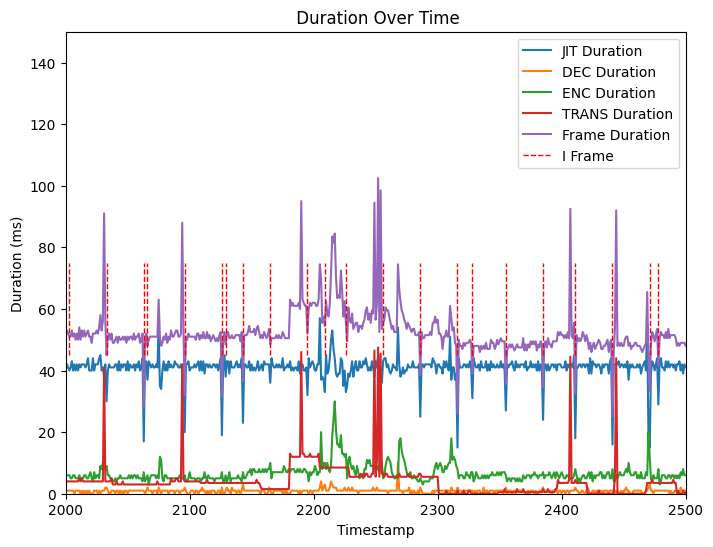

<Figure size 640x480 with 0 Axes>

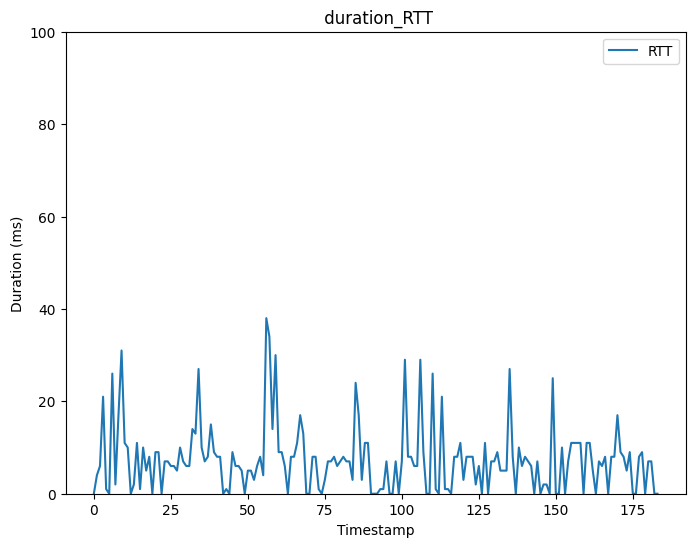

<Figure size 640x480 with 0 Axes>

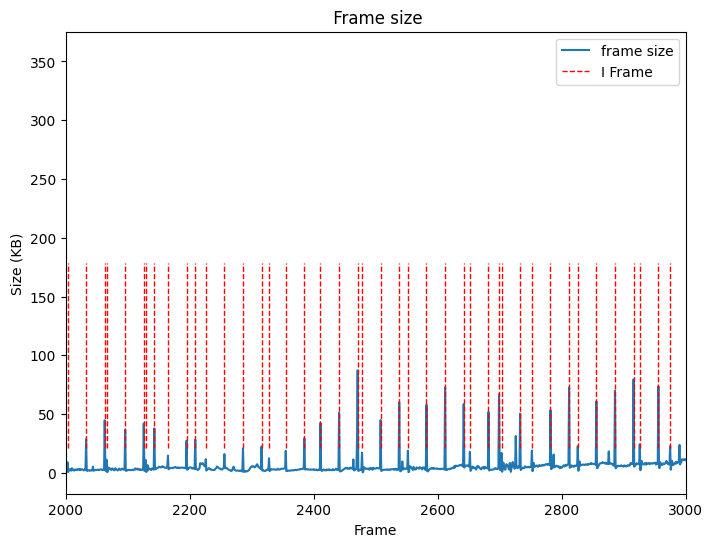

<Figure size 640x480 with 0 Axes>

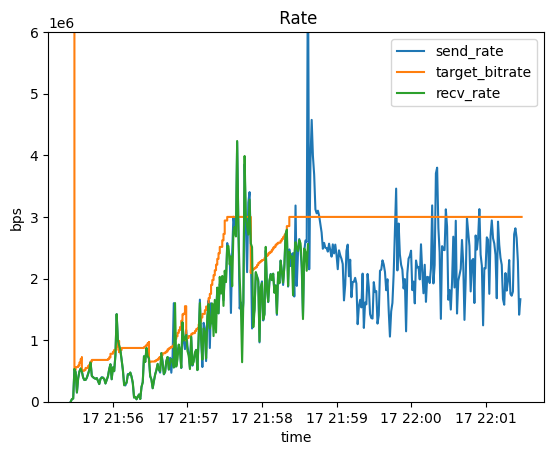

<Figure size 640x480 with 0 Axes>

In [13]:
import re
from datetime import datetime
import matplotlib.pyplot as plt
send_file="./offer/test-rtt2.log"
recv_file="./answer/test-rtt2.log"
jit_dur_values=plot_jit_delay(recv_file)
dec_dur_values=plot_dec_delay(recv_file)
enc_dur_values=plot_enc_delay(send_file)
rtt_dur_values=plot_rtt(send_file)
size_dur_values=plot_frame_size(send_file)
recv_rate_values=plot_recv_rate(recv_file)
send_rate_values=plot_send_rate(send_file)
bitrate_values=target_bitrate(send_file)
encodec_values=encode_bitrate(send_file)
trans_dur_values=trans_packet_dur(recv_file)
frame_type_values=plot_frame_type(send_file)

# print(encodec_values)
# 提取时间戳和 jit_dur 列表
# timestamps1 = [entry['timestamp'] for entry in jit_dur_values]
jit_durs = [entry['jit_dur'] for entry in jit_dur_values]
# bytes_frame = [entry['bytes_frame'] for entry in jit_dur_values]
# timestamps2 = [entry['timestamp'] for entry in dec_dur_values]
dec_durs = [entry['dec_dur'] for entry in dec_dur_values]
# timestamps3 = [float(entry['timestamp'])/1000.0 for entry in enc_dur_values]
enc_durs = [entry['enc_dur'] for entry in enc_dur_values]
# trans_durs = [entry['trans_dur'] for entry in trans_dur_values]
timestamps6 = [entry['timestamp'] for entry in rtt_dur_values]
rtt_durs=[enrty["rtt"] for enrty in rtt_dur_values]
size_durs=[entry["size"] for entry in size_dur_values]
timestamps1 = [entry['timestamp'] for entry in send_rate_values]
send_rate=[entry["send_rate"] for entry in send_rate_values]
timestamps2 = [entry['timestamp'] for entry in recv_rate_values]
recv_rate=[entry["recv_rate"] for entry in recv_rate_values]
timestamps3 = [entry['timestamp'] for entry in bitrate_values]
bitrate=[entry["recv_rate"] for entry in bitrate_values]
timestamps4 = [entry['timestamp'] for entry in encodec_values]
encodec_rate=[entry["encodec_rate"] for entry in encodec_values]
timestamps5 = [entry['timestamp'] for entry in trans_dur_values]
trans_dur=[entry["value"] for entry in trans_dur_values]
trans_dur=calculatr_trans_dur(timestamps6,rtt_durs,timestamps5,trans_dur)
frame_type=[entry["frame_type"] for entry in frame_type_values]
#提取I帧索引
i_frame_indices = [i for i, frame_type in enumerate(frame_type) if frame_type == 100]

# 画图
# plt.figure(figsize=(8, 6))
# plt.plot(trans_durs, label='TRANS Duration')
# plt.xlabel('Timestamp')
# plt.ylabel('Duration (ms)')
# plt.title(' Duration Over Time')
# plt.legend()
# plt.show()
# plt.savefig('duration_TRANS.png')

plt.figure(figsize=(8, 6))
plt.plot( jit_durs, label='JIT Duration')
plt.plot(dec_durs, label='DEC Duration')
plt.plot(enc_durs, label='ENC Duration')
plt.plot(trans_dur, label='TRANS Duration')
plt.plot([a + b + c + d for a, b, c ,d in zip(trans_dur, enc_durs, dec_durs,jit_durs)], label='Frame Duration')
# plt.scatter(i_frame_indices, [100] * len(i_frame_indices), color='red', label='I Frame', marker='o')
# 在I帧的位置画竖线
for i_frame_index in i_frame_indices:
    plt.axvline(x=i_frame_index, color='red', ymin=0.3, ymax=0.5,linestyle='--', linewidth=1,label='I Frame' if i_frame_index == i_frame_indices[0] else '')

plt.xlabel('Timestamp')
plt.ylabel('Duration (ms)')
plt.ylim(0,150)
plt.xlim(2000,2500)
plt.title(' Duration Over Time')
plt.legend()
plt.show()
plt.savefig('duration_DEC.png')

plt.figure(figsize=(8, 6))
plt.plot(rtt_durs, label='RTT')
plt.xlabel('Timestamp')
plt.ylabel('Duration (ms)')
plt.ylim(0,100)
plt.title(' duration_RTT')
plt.legend()
plt.show()
plt.savefig('duration_RTT.png')

plt.figure(figsize=(8, 6))
plt.plot(size_durs, label='frame size')
for i_frame_index in i_frame_indices:
    plt.axvline(x=i_frame_index, color='red', ymin=0.1, ymax=0.5,linestyle='--', linewidth=1,label='I Frame' if i_frame_index == i_frame_indices[0] else '')
plt.xlabel('Frame')
plt.ylabel('Size (KB)')
plt.title(' Frame size')
plt.xlim(2000,3000)
plt.legend()
plt.show()
plt.savefig('duration_FrameSize.png')

plt.figure()
plt.plot(timestamps1,send_rate, label='send_rate')
# plt.plot(timestamps3,bitrate, label='target_bitrate') # 
plt.plot(timestamps4,encodec_rate, label='target_bitrate') #receiver REMB RTCP estimated maximum bitrate
plt.plot(timestamps2,recv_rate, label='recv_rate')
plt.xlabel('time')
plt.ylabel('bps')
plt.ylim(0,6000000)
plt.title(' Rate')
plt.legend()
plt.show()
plt.savefig('Rate.png')
# plt.figure(figsize=(8, 6))
# plt.plot(timestamps1, bytes_frame, label='bytes')
# plt.xlabel('Timestamp')
# plt.ylabel('Duration (ms)')
# plt.title('Frame size')
# plt.legend()
# plt.show()
# plt.savefig('bytes.png')
